In [25]:
import librosa
from matplotlib import pyplot as plt
import IPython.display as ipd

import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift

def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)

# shift < 0 means that y starts 'shift' time steps before x # shift > 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

In [6]:
path_raw = "raw.wav"
path_ref_1 = "ref_1.wav"

sr = 16000

In [8]:
raw,_ = librosa.load(path_raw,sr=sr,mono=False)
ref_1,_ = librosa.load(path_ref_1,sr=sr)

print(raw.shape)
print(ref_1.shape)

(4, 4931072)
(61408,)


In [13]:
data_1 = raw[0,:sr*10]
data_2 = np.pad(ref_1,(0,len(data_1) - len(ref_1)))

print(data_1.shape)
print(data_2.shape)

(160000,)
(160000,)


-40003
61408
61408


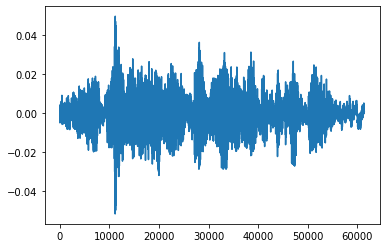

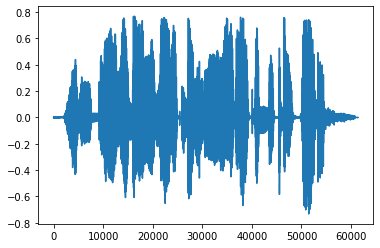

## data_3

## data_4

0


In [29]:
diff = compute_shift(data_1,data_2)
print(diff)

data_3 = data_1[-diff:-diff+len(ref_1)]
data_4 = data_2[:len(ref_1)]
print(len(data_3))
print(len(data_4))

plt.figure()

plt.plot(data_3)

plt.figure()
plt.plot(data_4)

plt.show()

ipd.display(ipd.Markdown('## data_3'))
ipd.display(ipd.Audio(data_3, rate=sr))

ipd.display(ipd.Markdown('## data_4'))
ipd.display(ipd.Audio(data_4, rate=sr))

val = compute_shift(data_3,data_4)
print(val)